# 잘 만든 Augmentation, 이미지 100장 안 부럽다

## 준비하기

In [1]:
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import os

sample_img_path = os.getenv('HOME')+'/aiffel/data_augmentation/images/mycat.jpg'
sample_img_path

'/aiffel/aiffel/data_augmentation/images/mycat.jpg'

이미지를 불러와서 적절하게 resizing해주겠습니다.

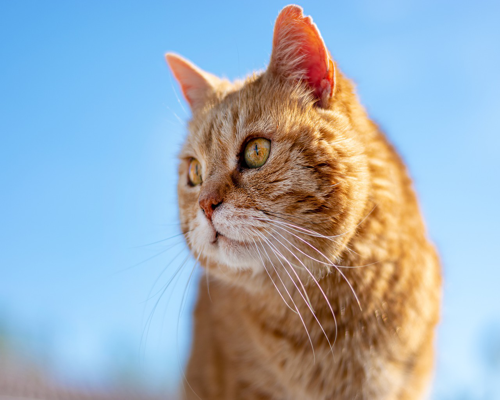

In [3]:
image = Image.open(sample_img_path).resize((500,400))
image_tensor = tf.keras.preprocessing.image.img_to_array(image)

image

## Flip 해보기

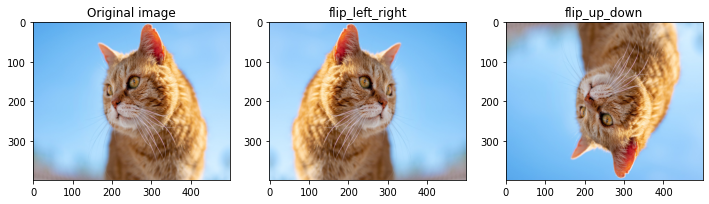

In [4]:
flip_lr_tensor = tf.image.flip_left_right(image_tensor)
flip_ud_tensor = tf.image.flip_up_down(image_tensor)
flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)

plt.figure(figsize=(12,12))

plt.subplot(1,3,1)
plt.title('Original image')
plt.imshow(image)

plt.subplot(1,3,2)
plt.title('flip_left_right')
plt.imshow(flip_lr_image)

plt.subplot(1,3,3)
plt.title('flip_up_down')
plt.imshow(flip_ud_image)

plt.show()

* 위에는 일괄적으로 상하 or 좌우 반전을 적용한건데, 우리는 이걸 확률에 따라서 적용되도록 해야합니다. 
* 그래야 반전이 되지 않는 원본 데이터도 활용이 될 수 있기 때문입니다!!     
* random_flip_left_right, random_flip_up_down을 사용하고 
* 필요에 따라서는 직접 이 둘을 합쳐서 random_flip으로 상하좌우 반전을 적용하는 함수를 직접 만들어 볼 수 있습니다.

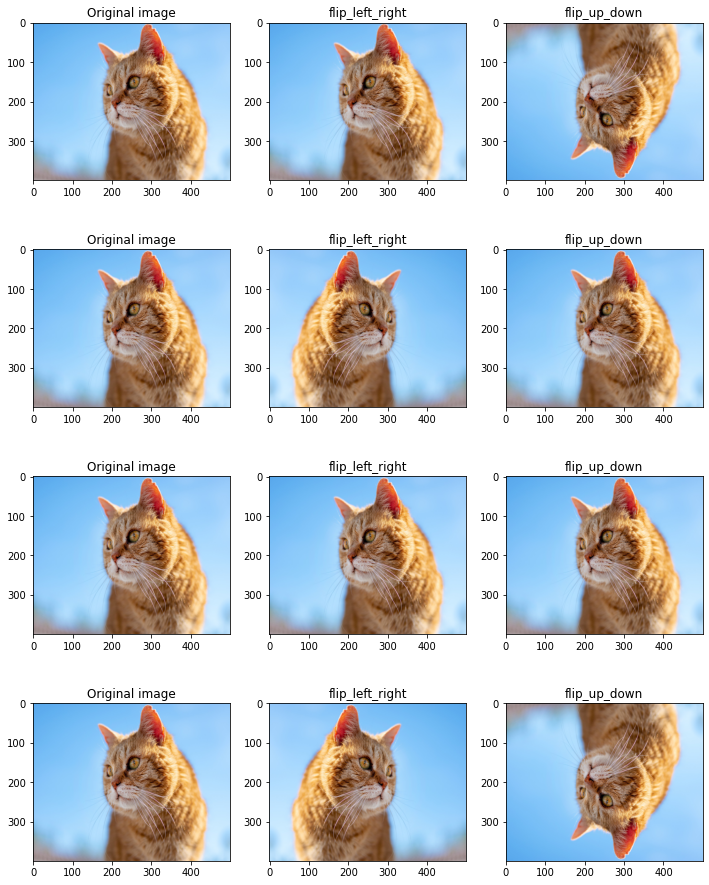

In [6]:
plt.figure(figsize=(12, 16))

row = 4
for i in range(row):
    flip_lr_tensor = tf.image.random_flip_left_right(image_tensor)
    flip_ud_tensor = tf.image.random_flip_up_down(image_tensor)
    flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
    flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)
    
    plt.subplot(4,3,i*3+1)
    plt.title('Original image')
    plt.imshow(image)

    plt.subplot(4,3,i*3+2)
    plt.title('flip_left_right')
    plt.imshow(flip_lr_image)

    plt.subplot(4,3,i*3+3)
    plt.title('flip_up_down')
    plt.imshow(flip_ud_image)

## Center Crop 


------------

중앙을 기준으로 자른 이미지를 사용하는 augmentation기법

* 이 center crop을 적용할 때에는 주의해서 사용해야합니다.
* central_fraction : 얼마나 확대를 할지 조절하는 매개변수
* 1.0인 경우는 원본이미지와 같음
* 고양이 이미지를 확대하면 0.5까지는 보일 수 있지만 0.25수준으로 내려가면 고양이의 형상을 찾기 어려울 수 있으므로 central_fraction 범위를 문제가 생기지 않는 범위에서 랜덤하게 조절되도록 하는게 중요합니다.

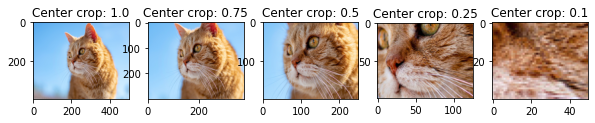

In [7]:
plt.figure(figsize=(12, 15))

central_fractions = [1.0, 0.75, 0.5, 0.25, 0.1]
col = len(central_fractions)
for i, frac in enumerate(central_fractions):
    cropped_tensor = tf.image.central_crop(image_tensor, frac)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.title(f'Center crop: {frac}')
    plt.imshow(cropped_img)

random하게 central_crop적용하는 함수는 텐서플로우에서 기본적으로 제공되지 않기때문에
tf.random.uniform을 사용해서 central_fraction 매개변수에 전달할 값을 만들고 이를 사용해 cropped_tensor를 만들어내는 random_central_crop() 함수를 만들겠습니다.

In [8]:
def random_central_crop(image_tensor, range=(0, 1)):
    central_fraction = tf.random.uniform([1], minval=range[0], maxval=range[1], dtype=tf.float32)
    cropped_tensor = tf.image.central_crop(image_tensor, central_fraction)
    return cropped_tensor
print('=3')

=3


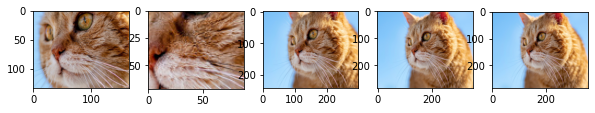

In [9]:
plt.figure(figsize=(12, 15))

col = 5
for i, frac in enumerate(central_fractions):
    cropped_tensor =random_central_crop(image_tensor)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.imshow(cropped_img)

## augmentation을 활용해보기

### 1) tf.image.random_crop()

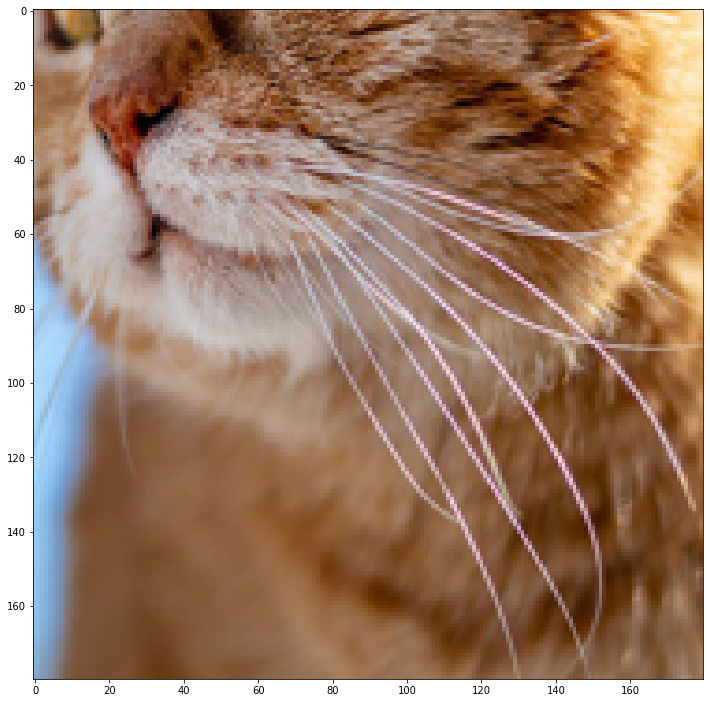

In [10]:
plt.figure(figsize=(12,15))


random_crop_tensor = tf.image.random_crop(image_tensor,[180,180,3])
random_crop_image = tf.keras.preprocessing.image.array_to_img(random_crop_tensor)

plt.imshow(random_crop_image)
plt.show()

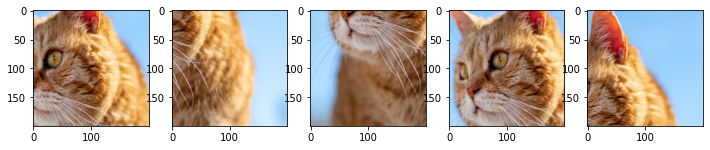

In [11]:
plt.figure(figsize=(12,15))

for i in range(5):
    random_crop_tensor = tf.image.random_crop(image_tensor,[200,200,3])
    random_crop_image = tf.keras.preprocessing.image.array_to_img(random_crop_tensor)
    plt.subplot(1,5,i+1)
    plt.imshow(random_crop_image)

### 2) tf.image.random_brightness()

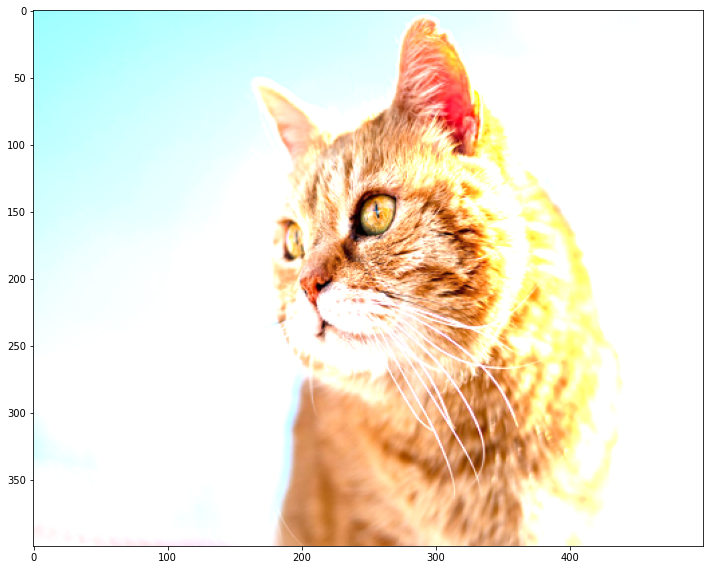

In [12]:
plt.figure(figsize=(12,15))

random_bright_tensor = tf.image.random_brightness(image_tensor, max_delta=128)
random_bright_tensor = tf.clip_by_value(random_bright_tensor, 0, 255) # 텐서 값을 지정된 최소 및 최대로 자릅니다.
random_bright_image = tf.keras.preprocessing.image.array_to_img(random_bright_tensor)

plt.imshow(random_bright_image)
plt.show()

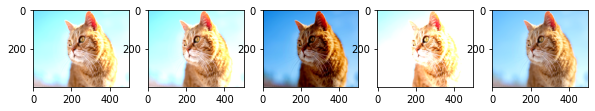

In [16]:
plt.figure(figsize=(12,15))

col = 5

for i in range(5):
    random_bright_tensor = tf.image.random_brightness(image_tensor, max_delta=128)
    random_bright_tensor = tf.clip_by_value(random_bright_tensor, 0, 255)
    random_bright_image = tf.keras.preprocessing.image.array_to_img(random_bright_tensor)
    
    plt.subplot(1,col+1, i+1)
    plt.imshow(random_bright_image)

## imgaug 라이브러리 사용하기

-------
* 이미지에 augmentation을 적용할 때는 정답(ground truth 또는 gt)이 되는 데이터에도 augmentation이 동일하게 적용되야 합니다.
* 이미지가 반전이 되었는데 정답으로 활용되는 정답 데이터가 반전이 되지 않은 bounding box라면 틀린 정답을 모델이 학습하게 되고 이는 성능에 악영향을 줄 수 있습니다.

imgaug에서는 배열을 이미지의 기본 형태로 사용하기 때문에 PIL Image 데이터형을 넘파이(numpy) 배열로 변환하여 사용하도록 합니다.

In [17]:
import numpy as np
import imgaug.augmenters as iaa

image_arr = np.array(image)
image_arr.shape

(400, 500, 3)

## augmentation 기법 사용해 보기

### iaa.Affine()
- 2D 변환의 일종인 아핀 변환은 이미지의 스케일(scale)을 조절하거나 평행이동, 또는 회전 등의 변환을 줄 수 있습니다.

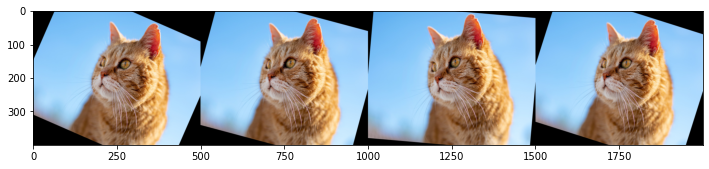

In [18]:
images = [image_arr, image_arr, image_arr, image_arr]

rotate = iaa.Affine(rotate=(-25,25))
images_aug = rotate(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

### iaa.Crop()

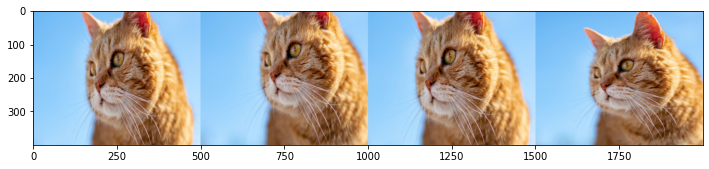

In [19]:
images = [image_arr, image_arr, image_arr, image_arr]

crop = iaa.Crop(percent=(0,0.2))
images_aug = crop(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

### iaa.Sequential()

--------------------

imgaug에서는 iaa.Sequential를 사용해서 여러 가지의 augmentation 기법을 순차적으로 적용할 수 있습니다.

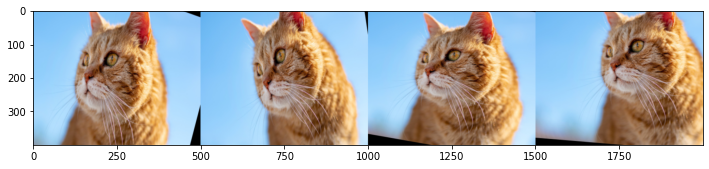

In [20]:
images = [image_arr, image_arr, image_arr, image_arr]

rotate_crop = iaa.Sequential([
    iaa.Affine(rotate=(-25, 25)),
    iaa.Crop(percent=(0, 0.2))
])
images_aug = rotate_crop(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

위 코드처럼 사용하면 순서가 고정이 됩니다. random을 활용해서 순서를 바꿀 수 있도록 코드를 바꿔볼께요!

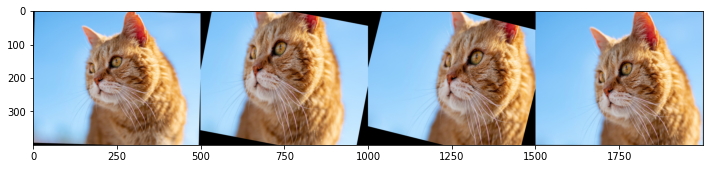

In [21]:
images = [image_arr, image_arr, image_arr, image_arr]

rotate_crop = iaa.Sequential([
    iaa.Crop(percent=(0, 0.2)),
    iaa.Affine(rotate=(-25, 25)),
], random_order=True)
images_aug = rotate_crop(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

여러 가지 augmentation 중 하나를 선택하도록 할 때는 어떻게 할 수 있을까요? iaa.OneOf()를 사용하면 여러 augmentation 기법들 중 하나를 선택하도록 할 수 있습니다.    
* ex) 색상에 변화를 줄 때 여러 변환이 불필요한 경우 선택지 중 하나의 기법만 적용

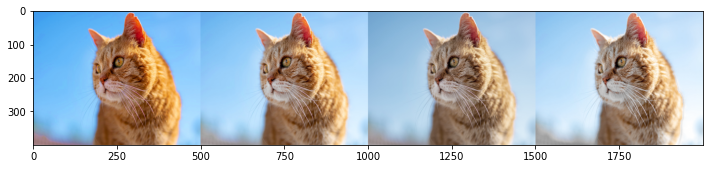

In [22]:
# gray scale로 변환하거나 saturation을 변화하는 augmentation 둘 중 하나가 적용되는 함수
images = [image_arr, image_arr, image_arr, image_arr]

seq = iaa.OneOf([
     iaa.Grayscale(alpha=(0.0, 1.0)),
     iaa.AddToSaturation((-50, 50))
])
images_aug = seq(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

### iaa.Sometimes()

-------------------------
augmentation들이 일정 확률로 선택이 되게 하는 기능을 사용하는 iaa.Sometimes()은 위의 iaa.OneOf()처럼 사용할 수 있습니다.


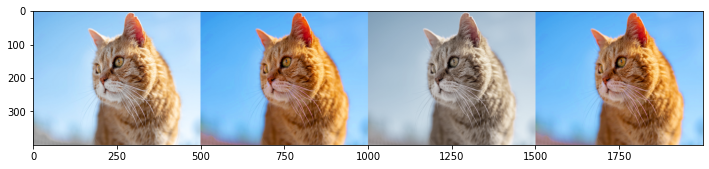

In [23]:
# iaa.AddToSaturation()을 0.6의 확률로, iaa.Grayscale()를 0.2의 확률로 적용하는 augmentation 함수를 구현

images = [image_arr, image_arr, image_arr, image_arr]

seq = iaa.Sequential([
     iaa.Sometimes(
         0.6,
         iaa.AddToSaturation((-50, 50))
     ),
     iaa.Sometimes(
         0.2,
         iaa.Grayscale(alpha=(0.0, 1.0))
     )
])
images_aug = seq(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

개와 고양이를 분류하는 모델을 만든다고 가정하고 직접 복잡한 augmentation을 만들어 볼께요!
* 조합될 수 있는 가짓수는 1024가지가 넘게
* 시각화는 100장

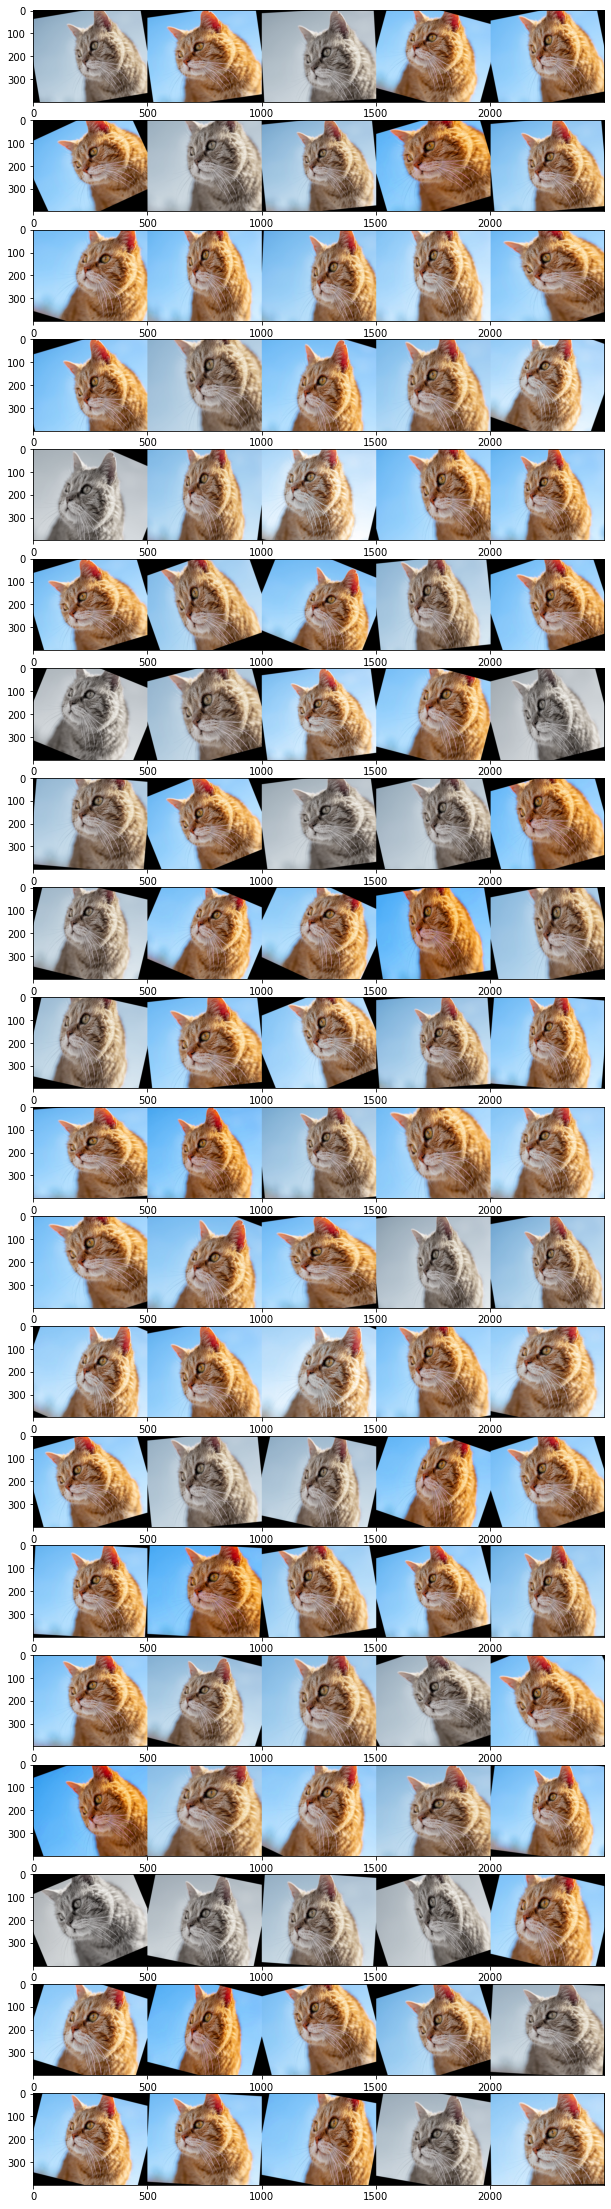

In [24]:
seq = iaa.Sequential([
    iaa.OneOf([
         iaa.Grayscale(alpha=(0.0, 1.0)),
         iaa.Sometimes(
             0.5,
             iaa.AddToSaturation((-50, 50))
         )
    ]),
    iaa.Sequential([
        iaa.Crop(percent=(0, 0.2)),
        iaa.Affine(rotate=(-25, 25)),
    ], random_order=True)
])

plt.figure(figsize=(12, 40))
for i in range(20):
    images = [image_arr, image_arr, image_arr, image_arr, image_arr]
    images_aug = seq(images=images)
    plt.subplot(20,1,i+1)
    plt.imshow(np.hstack(images_aug))
    
plt.show()